# ASL Recognition Project | k-Nearest Neighbors Clustering Algorithm
### Kyle Lee, Kathy Xiang, Jeremiah Kim, Jonas Hansen
### December 16, 2021

In [ ]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import LabelBinarizer

In [ ]:
from google.colab import drive 
drive._mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Loading MNIST American Sign Language dataset
data_dir = "/content/gdrive/MyDrive/Sophomore Year/Semester 1/ENG-SCI 111/Final Project/Code and Data/archive"

for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gdrive/MyDrive/Sophomore Year/Semester 1/ENG-SCI 111/Final Project/Code and Data/archive/amer_sign2.png
/content/gdrive/MyDrive/Sophomore Year/Semester 1/ENG-SCI 111/Final Project/Code and Data/archive/sign_mnist_test.csv
/content/gdrive/MyDrive/Sophomore Year/Semester 1/ENG-SCI 111/Final Project/Code and Data/archive/american_sign_language.PNG
/content/gdrive/MyDrive/Sophomore Year/Semester 1/ENG-SCI 111/Final Project/Code and Data/archive/amer_sign3.png
/content/gdrive/MyDrive/Sophomore Year/Semester 1/ENG-SCI 111/Final Project/Code and Data/archive/sign_mnist_train.csv
/content/gdrive/MyDrive/Sophomore Year/Semester 1/ENG-SCI 111/Final Project/Code and Data/archive/sign_mnist_train/sign_mnist_train.csv
/content/gdrive/MyDrive/Sophomore Year/Semester 1/ENG-SCI 111/Final Project/Code and Data/archive/sign_mnist_test/sign_mnist_test.csv


In [ ]:
# Loading the data to train as Pandas DataFrames

train_pd_data = pd.read_csv(os.path.join(data_dir, "sign_mnist_train.csv"))
test_pd_data = pd.read_csv(os.path.join(data_dir, "sign_mnist_test.csv"))

y_train = train_pd_data['label'].values
y_test = test_pd_data['label'].values

train_pd_data.drop('label', axis=1, inplace=True)
test_pd_data.drop('label', axis=1, inplace=True)
test_pd_data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,153,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,166,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,210,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,205,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [ ]:
# Turn DataFrames into Numpy arrays
x_train = np.array(train_pd_data)
x_test = np.array(test_pd_data)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# Turn image pixel data into vectors
x_test = x_test.reshape([len(y_test),784])
x_train = x_train.reshape([len(y_train),784])

In [ ]:
## Now we implement a Principle Component Analysis algorithm, 
#   returning the eigendecomposition of the covariance matrix of the ASL image data
def pca_alg(data): 
    # First, we center the data around its mean
    mean = np.mean(data, axis = 0)
    centered_dat = data - mean

    # Next, we calculate the covariance matrix of the centered data
    cov_mat = np.cov(centered_dat.T)

    # Then we extract the eigenvalues and eigenvectors from the covariance matrix
    eigvals, eigvecs = np.linalg.eig(cov_mat)

    # Finally, we separate the sorted eigendecomposition values
    i = np.argsort(eigvals)[::-1]
    eigvecs = eigvecs[:,i]
    eigvals = eigvals[i]

    return(eigvals, eigvecs, mean)

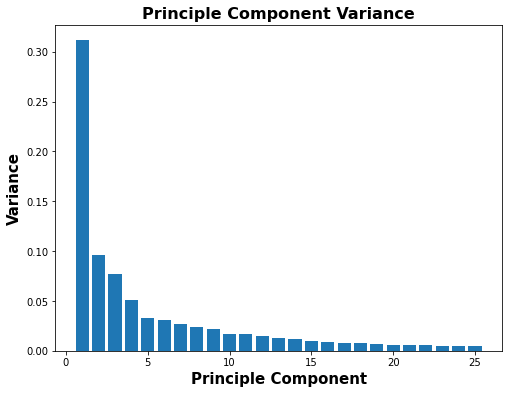

In [ ]:
# Plotting the PCA variance in descending order
e_vals, e_vecs, data_mean = pca_alg(x_train)
e_var = e_vals/sum(e_vals)
pcs = 25

fig = plt.figure(figsize=(8,6))
plt.bar(range(1,pcs+1), e_var[:pcs])
plt.title("Principle Component Variance", fontsize=16, fontweight="bold")
plt.xlabel("Principle Component", fontsize=15, fontweight="bold")
plt.ylabel("Variance", fontsize=15, fontweight="bold")
plt.show()

In [ ]:
## Now we "train" a range of Principle Components from our PCA model by projecting the data onto the eigenvectors
# Defining number of Principle Components to train
n_pcs = 100

# Projecting data onto eigenvectors
pc_evecs = e_vecs[:, :n_pcs]
xtrain_kfacs = np.dot(x_train - data_mean, pc_evecs)
xtest_kfacs = np.dot(x_test - data_mean, pc_evecs)

In [ ]:
# Defining our k-nearest neighbor function
def knn_func(train_x, train_y, K_val, test_x, dist_func = 'euc'):
    if dist_func != 'euc':
        dist_func = (abs(test_x - train_x)).sum(axis = 1)
    else:
        dist_func = np.sqrt(((test_x - train_x)**2).sum(axis = 1))

    sorted_dists = np.argsort(dist_func)
    classes = np.zeros(24)
    for i in range(K_val):
        if train_y[sorted_dists[i]] == 0:
            classes[0] += 1
        elif train_y[sorted_dists[i]] == 1:
            classes[1] += 1
        elif train_y[sorted_dists[i]] == 2:
            classes[2] += 1
        elif train_y[sorted_dists[i]]==3:
            classes[3] += 1
        elif train_y[sorted_dists[i]]==4:
            classes[4] += 1
        elif train_y[sorted_dists[i]]==5:
            classes[5] += 1
        elif train_y[sorted_dists[i]]==6:
            classes[6] += 1
        elif train_y[sorted_dists[i]]==7:
            classes[7] += 1
        elif train_y[sorted_dists[i]]==8:
            classes[8] += 1
        elif train_y[sorted_dists[i]]==9:
            classes[9] += 1
        elif train_y[sorted_dists[i]]==10:
            classes[10] += 1
        elif train_y[sorted_dists[i]]==11:
            classes[11] += 1
        elif train_y[sorted_dists[i]]==12:
            classes[12] += 1
        elif train_y[sorted_dists[i]]==13:
            classes[13] += 1            
        elif train_y[sorted_dists[i]]==14:
            classes[14] += 1
        elif train_y[sorted_dists[i]]==15:
            classes[15] += 1
        elif train_y[sorted_dists[i]]==16:
            classes[16] += 1
        elif train_y[sorted_dists[i]]==17:
            classes[17] += 1
        elif train_y[sorted_dists[i]]==18:
            classes[18] += 1
        elif train_y[sorted_dists[i]]==19:
            classes[19] += 1
        elif train_y[sorted_dists[i]]==20:
            classes[20] += 1
        elif train_y[sorted_dists[i]]==21:
            classes[21] += 1
        elif train_y[sorted_dists[i]]==22:
            classes[22] += 1
        elif train_y[sorted_dists[i]]==23:
            classes[23] += 1   

    return np.argmax(classes)

In [ ]:
# Defining our American Sign Language alphabet (note J and Z are missing because they require motion)
alpha = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [ ]:
acc_rate = []
print(xtrain_kfacs.shape)
print(y_train.shape)
print(xtest_kfacs[0].shape)
for j in range(1,20):
    pred_list = []
    y_test_list = []
    for i in range(xtest_kfacs.shape[0]):
        pred_i = knn_func(xtrain_kfacs, y_train, j, xtest_kfacs[i])
        pred_list.append(pred_i == y_test[i])
        # y_test_list.append(y_test[i])

    acc_rate.append(np.mean(pred_list))
    print(np.mean(pred_list))

(27455, 100)
(27455,)
(100,)
0.7901561628555493
0.7852760736196319
0.7847183491355271
0.7834634690462912
0.7837423312883436
0.7805354155047407
0.7767707752370329
0.7752370329057445
0.7737032905744562
0.7732849972113776
0.7720301171221416
0.7686837702175126
0.7658951477969883
0.7649191299498048
0.7645008365867262
0.7617122141662019
0.7631065253764641
0.7615727830451757
0.7611544896820971


Maximum Accuracy:- 0.7901561628555493 at K = 1


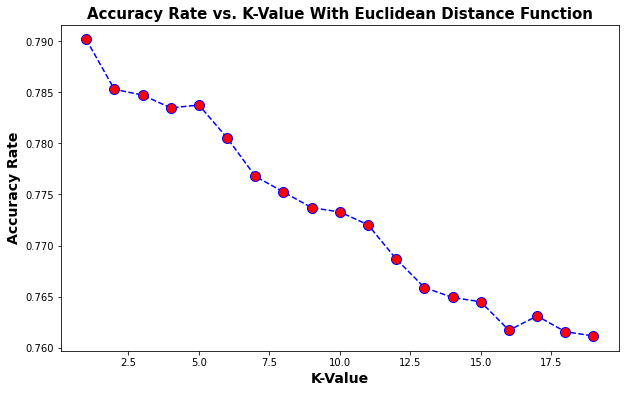

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 20), acc_rate,color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K-Value With Euclidean Distance Function', fontsize=15, fontweight="bold")
plt.xlabel('K-Value', fontsize=14, fontweight="bold")
plt.ylabel('Accuracy Rate', fontsize=14, fontweight="bold")
print("Maximum Accuracy:-", max(acc_rate), "at K =", acc_rate.index(max(acc_rate))+1)

In [ ]:
# Running our KNN model with a Euclidean distance function

K = 1
incorrect = 0
correct = 0
counter = 0
acc_val = 0
acc = []
euc_predicitions = []

start_time = time.time()
for i in range(xtest_kfacs.shape[0]):
    euc_prediction = knn_func(xtrain_kfacs, y_train, K, xtest_kfacs[i])
    if euc_prediction != y_test[i]:
        incorrect += 1
        counter = -1
    else:
        correct += 1
        counter = 1
    
    acc_val += counter
    euc_predicitions.append(euc_prediction)
    acc.append(acc_val)
    end_time = time.time()

print("Accuracy =", (1 - incorrect/xtest_kfacs.shape[0])*100, "%")
print(" - - Runtime: %.0fmin %.0fs - - " %((end_time - start_time) // 60, (end_time - start_time) % 60))

Accuracy = 74.9302844394869 %
 - - Runtime: 1min 34s - - 


In [ ]:
# Running our KNN model with a Manhattan distance function

K_val = 7
incorrect = 0
correct = 0
man_acc = []
man_predictions = []

start_time = time.time()
for i in range(xtest_kfacs.shape[0]):
    man_prediction = knn_func(xtrain_kfacs, y_train, K_val, xtest_kfacs[i], dist_func="man")
    if man_prediction != y_test[i]:
        incorrect += 1
    else:
        correct += 1
    
    man_predictions.append(man_prediction)
    end_time = time.time()

print("Accuracy =", (1 - incorrect/xtest_kfacs.shape[0])*100, "%")
print(" - - Runtime: %.0fmin %.0fs - - " %((end_time - start_time) // 60, (end_time - start_time) % 60))

Accuracy = 79.88008923591745 %
 - - Runtime: 3min 8s - - 


In [ ]:
# Accuracy evolution with manhattan distance function
acc_rate_man = []
for j in range(1,20):
    pred_list_man = []
    y_test_list_man = []
    for i in range(xtest_kfacs.shape[0]):
        pred_i_man = knn_func(xtrain_kfacs, y_train, j, xtest_kfacs[i], dist_func="man")
        pred_list_man.append(pred_i_man == y_test[i])

    acc_rate_man.append(np.mean(pred_list_man))
    print("Accuracy =", np.mean(pred_list_man)*100, "%")

Accuracy = 81.05131065253765 %
Accuracy = 80.3680981595092 %
Accuracy = 80.87005019520358 %
Accuracy = 80.5633017289459 %
Accuracy = 80.91187953151143 %
Accuracy = 80.81427774679308 %
Accuracy = 81.09313998884551 %
Accuracy = 80.89793641940881 %
Accuracy = 81.09313998884551 %
Accuracy = 80.84216397099833 %
Accuracy = 80.89793641940881 %
Accuracy = 80.633017289459 %
Accuracy = 80.87005019520358 %
Accuracy = 80.45175683212493 %
Accuracy = 80.59118795315115 %
Accuracy = 80.4238706079197 %
Accuracy = 80.31232571109872 %
Accuracy = 80.28443948689348 %
Accuracy = 80.31232571109872 %


Maximum Accuracy:- 81.09313998884551% at K = 7


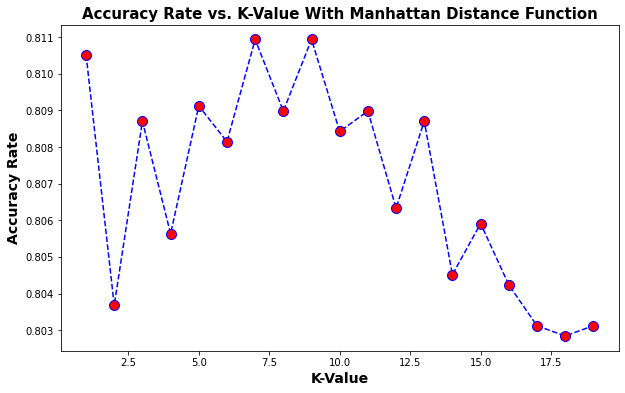

In [ ]:
# Plotting KNN model accuracy vs K-value with Manhattan distance function 
plt.figure(figsize=(10,6))
plt.plot(range(1, 20), acc_rate_man,color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K-Value With Manhattan Distance Function', fontsize=15, fontweight="bold")
plt.xlabel('K-Value', fontsize=14, fontweight="bold")
plt.ylabel('Accuracy Rate', fontsize=14, fontweight="bold")
print("Maximum Accuracy:-", str(max(acc_rate_man)*100) + "%", "at K =", acc_rate_man.index(max(acc_rate_man))+1)

In [ ]:
lb_train = LabelBinarizer()
lb_test = LabelBinarizer()
y_train_bin = lb_train.fit_transform(y_train)
y_test_bin = lb_test.fit_transform(y_test)

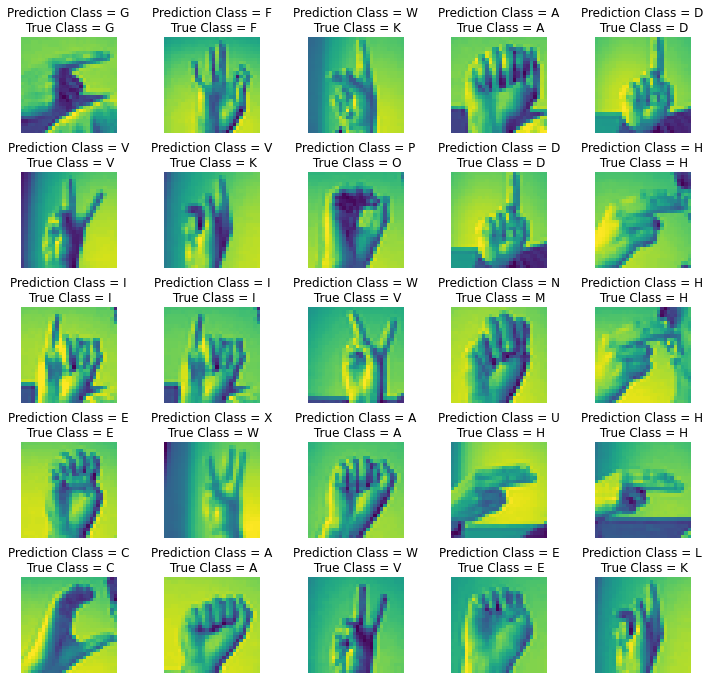

In [ ]:
# Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = " + str(alpha[int(man_predictions[i])]) + \
                      "\n True Class = " + str(alpha[int(np.where(y_test_bin[i] == 1)[0][0])]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)